# Statistical Learning: Bagging and Random Forest

### Jonathan Gragg

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score,\
    recall_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')


## 1. Load the the Heart Disease dataset. Print the first few rows.

In [3]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,male,typical_angina,145,233,higher_than_120,left_vent_hypertrophy,150,no,2.3,downsloping,0.0,fixed_defect,0
1,67,male,asymptomatic,160,286,lower_than_120,left_vent_hypertrophy,108,yes,1.5,flat,3.0,normal,1
2,67,male,asymptomatic,120,229,lower_than_120,left_vent_hypertrophy,129,yes,2.6,flat,2.0,reversable_defect,1
3,37,male,non_anginal_pain,130,250,lower_than_120,normal,187,no,3.5,downsloping,0.0,normal,0
4,41,female,atypical_angina,130,204,lower_than_120,left_vent_hypertrophy,172,no,1.4,upsloping,0.0,normal,0


## 2. Transform the data for modeling.
* Create a data frame of the following variables: age, trestbps, chol, thalach, sex, slope, cp, and hd.
* Transform the categorical variables to dummy variables (dropping one of the levels for each variable).
* Print the first few rows of this new data frame.

In [4]:
cols = ['age', 'trestbps', 'chol', 'thalach', 'sex', 'slope','cp','hd']
data = heart[cols].copy()
data = pd.get_dummies(data, drop_first=True)
data.head()


,age,trestbps,chol,thalach,hd,sex_male,slope_flat,slope_upsloping,cp_atypical_angina,cp_non_anginal_pain,cp_typical_angina
0,63,145,233,150,0,1,0,0,0,0,1
1,67,160,286,108,1,1,1,0,0,0,0
2,67,120,229,129,1,1,1,0,0,0,0
3,37,130,250,187,0,1,0,0,0,1,0
4,41,130,204,172,0,0,0,1,1,0,0


## 3. Create training testing sets.
* Create a feature matrix and response (target) vector for heart disease, and store these as numpy arrays.
* Split the data into training and test sets using a 70%/30% split, stratifying on heart disease.
* Print the dimensions of the feature matrices and response vectors for both sets.

In [5]:
y = heart.hd.values.reshape(-1,1)
X = data.drop('hd', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)

num_columns = [0,1,2,3]
scaler = StandardScaler(with_mean=0,with_std=1)
scaler.fit(X_train[:,num_columns])
X_train[:, num_columns] = scaler.transform(X_train[:,num_columns])

scaler = StandardScaler(with_mean=0,with_std=1)
scaler.fit(X_test[:,num_columns])
X_test[:, num_columns] = scaler.transform(X_test[:,num_columns])

print('X_train deminsions:',X_train.shape)
print('X_test deminsions:',X_test.shape)
print('y_train deminsions:',y_train.shape)
print('y_test deminsions:',y_test.shape)

X_train deminsions: (212, 10)
X_test deminsions: (91, 10)
y_train deminsions: (212, 1)
y_test deminsions: (91, 1)


## 4. Fit the following models to the training set. For each model, calculate and display precision, recall, and the AUC ROC for the training and test sets.

### Decision tree with max_depth = None.

In [6]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

preds_0 = dt.predict(X_train)
probs_0 = dt.predict_proba(X_train)[:, 1]

preds_1 = dt.predict(X_test)
probs_1 = dt.predict_proba(X_test)[:, 1]

print('TRAIN')
print('Precision: ', precision_score(y_train, preds_0).round(3))
print('Recall: ', recall_score(y_train, preds_0).round(3))
print('AUC ROC: ', roc_auc_score(y_train,probs_0).round(3))

print('TEST')
print('Precision: ', precision_score(y_test, preds_1).round(3))
print('Recall: ', recall_score(y_test, preds_1).round(3))
print('AUC ROC: ', roc_auc_score(y_test,probs_1).round(3))

TRAIN
Precision:  1.0
Recall:  0.948
AUC ROC:  0.999
TEST
Precision:  0.6
Recall:  0.643
AUC ROC:  0.653


### Random forests with max_depth = 1 and 100 trees (number of estimators).

In [7]:
rf = RandomForestClassifier(n_estimators=100,max_depth=1)

rf.fit(X_train,y_train)

preds_0 = rf.predict(X_train)
probs_0 = rf.predict_proba(X_train)[:, 1]

preds_1 = rf.predict(X_test)
probs_1 = rf.predict_proba(X_test)[:, 1]

print('TRAIN')
print('Precision: ', precision_score(y_train, preds_0).round(3))
print('Recall: ', recall_score(y_train, preds_0).round(3))
print('AUC ROC: ', roc_auc_score(y_train,probs_0).round(3))

print('TEST')
print('Precision: ', precision_score(y_test, preds_1).round(3))
print('Recall: ', recall_score(y_test, preds_1).round(3))
print('AUC ROC: ', roc_auc_score(y_test,probs_1).round(3))

TRAIN
Precision:  0.691
Recall:  0.691
AUC ROC:  0.818
TEST
Precision:  0.683
Recall:  0.667
AUC ROC:  0.8


### Gradient Boosted Decision Tree with a learning rate of 5 and 100 trees stumps (number of estimators).

In [8]:
gb = GradientBoostingClassifier(learning_rate=5,n_estimators=100)

gb.fit(X_train,y_train)

preds_0 = gb.predict(X_train)
probs_0 = gb.predict_proba(X_train)[:, 1]

preds_1 = gb.predict(X_test)
probs_1 = gb.predict_proba(X_test)[:, 1]

print('TRAIN')
print('Precision: ', precision_score(y_train, preds_0).round(3))
print('Recall: ', recall_score(y_train, preds_0).round(3))
print('AUC ROC: ', roc_auc_score(y_train,probs_0).round(3))

print('TEST')
print('Precision: ', precision_score(y_test, preds_1).round(3))
print('Recall: ', recall_score(y_test, preds_1).round(3))
print('AUC ROC: ', roc_auc_score(y_test,probs_1).round(3))

TRAIN
Precision:  0.467
Recall:  0.938
AUC ROC:  0.517
TEST
Precision:  0.562
Recall:  0.857
AUC ROC:  0.643


### Bagging with Decisions trees with max_features = .7.

In [9]:
bag = BaggingClassifier(max_features=0.7)

bag.fit(X_train,y_train)

preds_0 = bag.predict(X_train)
probs_0 = bag.predict_proba(X_train)[:, 1]

preds_1 = bag.predict(X_test)
probs_1 = bag.predict_proba(X_test)[:, 1]

print('TRAIN')
print('Precision: ', precision_score(y_train, preds_0).round(3))
print('Recall: ', recall_score(y_train, preds_0).round(3))
print('AUC ROC: ', roc_auc_score(y_train,probs_0).round(3))

print('TEST')
print('Precision: ', precision_score(y_test, preds_1).round(3))
print('Recall: ', recall_score(y_test, preds_1).round(3))
print('AUC ROC: ', roc_auc_score(y_test,probs_1).round(3))

TRAIN
Precision:  0.929
Recall:  0.948
AUC ROC:  0.992
TEST
Precision:  0.705
Recall:  0.738
AUC ROC:  0.824


## 5. Plot the feature importance of the fitted Random Forest model from (4).

<BarContainer object of 10 artists>

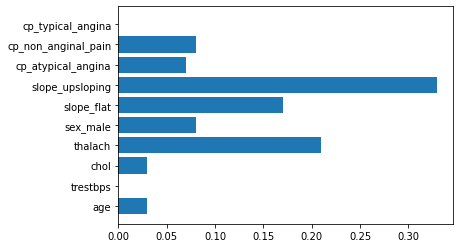

In [10]:
feature_names = data.drop('hd', axis=1).columns
plt.barh(feature_names, rf.feature_importances_)

## 6. Fit the random forest model again, but this time optimize the model by choosing better tuning parameters. Try a grid of possible values for max_depth and number of trees. You may use any metric to select the best model. Calculate and print precision, recall and AUC ROC for the training and testing sets.

* Hint: You can use either a validations set, cross-validation, or OOB error to select the best tuning parameters. 

In [18]:
rf2 = RandomForestClassifier()
trees = [10,50,100,150,200]
depths = [2,3,4,5,6,7,8,9]
rf_params = {'n_estimators':trees, 'max_depth':depths}
gs = GridSearchCV(rf2, param_grid=rf_params, scoring='roc_auc')
gs.fit(X_train, y_train)

preds_0 = gs.predict(X_train)
probs_0 = gs.predict_proba(X_train)[:, 1]

preds_1 = gs.predict(X_test)
probs_1 = gs.predict_proba(X_test)[:, 1]

print('TRAIN')
print('Precision: ', precision_score(y_train, preds_0).round(3))
print('Recall: ', recall_score(y_train, preds_0).round(3))
print('AUC ROC: ', roc_auc_score(y_train,probs_0).round(3))

print('TEST')
print('Precision: ', precision_score(y_test, preds_1).round(3))
print('Recall: ', recall_score(y_test, preds_1).round(3))
print('AUC ROC: ', roc_auc_score(y_test,probs_1).round(3))



TRAIN
Precision:  0.875
Recall:  0.938
AUC ROC:  0.97
TEST
Precision:  0.723
Recall:  0.81
AUC ROC:  0.846


## 7. Plot the feature importance of the fitted Random Forest model from (6).

{'max_depth': 6, 'n_estimators': 150}


<BarContainer object of 10 artists>

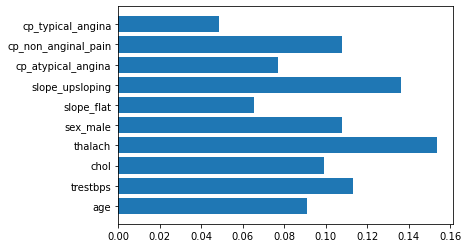

In [19]:
print(gs.best_params_)
plt.barh(feature_names, gs.best_estimator_.feature_importances_)

## Summary

I use the GridSearchCV to cross validate each model based off the ROC AUC. I wanted to get the model that gave me the maximum area under the curve. 



The decision tree was excelent for the data it was trained on, but peformed poorly on the test data showing that the decision tree is far more likely to be overfit to the training data than the other three methods. The gradient boosting model performed poorly for precision and auc, it was far more prone to label something as positive as opposed to the other models. Bagging performed well but the crossfold validation for Random forest performed the best on the test training set. Because this is a classification problem Random Forest is by far the superior model to chose.